Analysis

1. There is sign of correlation between the number of ride v.s. the dollar value of fare. Urban area has more driver and ride count while the dollar amount for each fare is lower than the rural and suburban cities.
--------------------------------------------------------------------------------------------------------------------------------------------
2. Despite the fact that the average fare charge at urban cities are lower, urban cities still made up majority of the revenue for Pyber.
--------------------------------------------------------------------------------------------------------------------------------------------
3. More than 80% of the drivers are from urban area, while only 62% of the total fares were made in the urban cities. This also means that 60% of the profit were share by 80% of the Pyber drivers. There could be more opportunities in the rural and suburban area.

In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_data = pd.read_csv(city_data_to_load)
ride_data = pd.read_csv(ride_data_to_load)
# Combine the data into a single dataset
combine_data = pd.merge(city_data, ride_data, on='city',how='right')
# Display the data table for preview
combine_data.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


In [3]:
#Urban Data
urban_data = combine_data.loc[combine_data["type"]=="Urban"]
average_urban = urban_data.groupby("city")
urban_fare = average_urban["fare"].mean()
urban_ride = average_urban["fare"].count()
urban_driver = average_urban["driver_count"].sum()


#Suburban Data
suburban_data = combine_data.loc[combine_data["type"]=="Suburban"]
average_suburban = suburban_data.groupby("city")
suburban_fare = average_suburban["fare"].mean()
suburban_ride = average_suburban["fare"].count()
suburban_driver = average_suburban["driver_count"].sum()


#Rural Data
rural_data = combine_data.loc[combine_data["type"]=="Rural"]
average_rural = rural_data.groupby("city")
rural_fare = average_rural["fare"].mean()
rural_ride = average_rural["fare"].count()
rural_driver = average_rural["driver_count"].sum()


## Bubble Plot of Ride Sharing Data

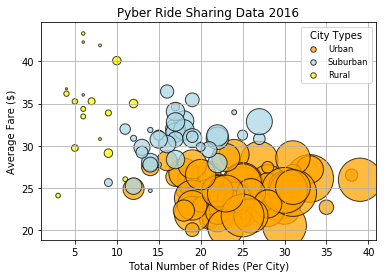

In [9]:
# Obtain the x and y coordinates for each of the three city types
plt.scatter(urban_ride,urban_fare,s=urban_driver, marker="o", facecolors = "orange", edgecolors="black",label="Urban",alpha=0.75)
plt.scatter(suburban_ride,suburban_fare,s=suburban_driver, marker="o", facecolors = "lightblue", edgecolors="black",label="Suburban",alpha=0.75)
plt.scatter(rural_ride,rural_fare,s=rural_driver, marker="o", facecolors = "yellow", edgecolors="black",label="Rural",alpha=0.75)
# Build the scatter plots for each city types

# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data 2016")
plt.xlabel("Total Number of Rides (Per City)")
plt.ylabel("Average Fare ($)")
plt.grid()
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded",
                numpoints=1, scatterpoints=1,
                loc="best", title="City Types",
                labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.tight_layout
# Save Figure
plt.show()


In [6]:
# Show plot
plt.show()

## Total Fares by City Type

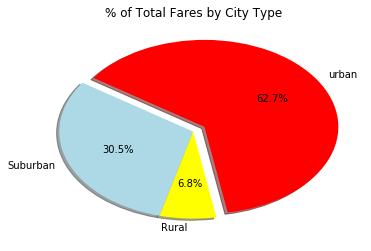

In [5]:
# Calculate Type Percents
total_fare = combine_data["fare"].sum()
urban_fare_sum = urban_data["fare"].sum()
suburban_fare_sum = suburban_data["fare"].sum()
rural_fare_sum = rural_data["fare"].sum()

ride_percent = [100*urban_fare_sum/total_fare, 100*suburban_fare_sum/total_fare, 100*rural_fare_sum/total_fare]
color = ["red", "lightblue", "yellow"]
label = ["urban","Suburban","Rural"]
explode=[0.1,0,0]
# Build Pie Chart
plt.pie(ride_percent, explode=explode, labels=label, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=280)
plt.title("% of Total Fares by City Type")
# Save Figure
plt.savefig("FarebyCity.png")

In [8]:
# Show Figure
plt.show()

## Total Rides by City Type

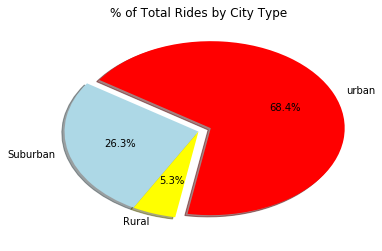

In [6]:
# Calculate Ride Percents
total_ride =combine_data["type"].count()

urban_ride_count = urban_data["type"].count()
suburban_ride_count = suburban_data["type"].count()
rural_ride_count = rural_data["type"].count()

ride_percent = [100*urban_ride_count/total_ride, 100*suburban_ride_count/total_ride, 100*rural_ride_count/total_ride]
color = ["red", "lightblue", "yellow"]
label = ["urban","Suburban","Rural"]
explode=[0.1,0,0]
# Build Pie Chart
plt.pie(ride_percent, explode=explode, labels=label, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=260)
plt.title("% of Total Rides by City Type")
# Save Figure
plt.savefig("RidebyCity.png")

In [10]:
# Show Figure
plt.show()

## Total Drivers by City Type

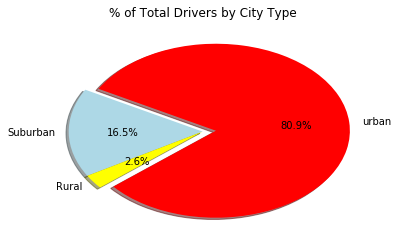

In [7]:
# Calculate Driver Percents
total_driver =combine_data["driver_count"].sum()

urban_city_data = city_data.loc[city_data["type"]=="Urban"]
suburban_city_data = city_data.loc[city_data["type"]=="Suburban"]
rural_city_data = city_data.loc[city_data["type"]=="Rural"]

urban_driver_count = urban_city_data["driver_count"].sum()
suburban_driver_count = suburban_city_data["driver_count"].sum()
rural_driver_count = rural_city_data["driver_count"].sum()

ride_percent = [100*urban_driver_count/total_driver, 100*suburban_driver_count/total_driver, 100*rural_driver_count/total_driver]
color = ["red", "lightblue", "yellow"]
label = ["urban","Suburban","Rural"]
# Build Pie Charts
plt.pie(ride_percent, explode=explode, labels=label, colors=color,
        autopct="%1.1f%%", shadow=True, startangle=220)
plt.title("% of Total Drivers by City Type")
# Save Figure
plt.savefig("DriversbyCity.png")

In [28]:
# Show Figure
plt.show()